In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier # model
from xgboost import plot_importance as xgb_plot_importance# 중요변수 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model


from sklearn.metrics import roc_curve,confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE
%matplotlib inline

from sklearn.utils.class_weight import compute_class_weight

import warnings
warnings.filterwarnings(action='ignore')

In [39]:
df_onehot = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_label = pd.read_csv('label_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_dropna = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot.columns

compute_class_weight(class_weight = "balanced" , 
                     classes=np.array(df_onehot['y'].unique()), 
                     y = df_onehot['y'])

df_mo = pd.read_csv('onehot_modifi.csv').drop('Unnamed: 0',axis=1)
df_mo_dropna = df_mo.drop(['unknown','marital_unknown','edu_unknown','default_unknown','house_unknown','loan_unknown','pout_unknown'],axis=1)

In [3]:
def score(a,b,c):
    confusion = np.round(confusion_matrix(a,b),3)
    accuracy = np.round(accuracy_score(a,b),3)
    precision = np.round(precision_score(a,b),3)
    recall = np.round(recall_score(a,b),3)
    f1 = np.round(f1_score(a,b),3)
    
    roc_auc = np.round(roc_auc_score(a,b),3)
    
#     print(f'Confusion Matrix of {c}')
#     display(pd.DataFrame(confusion))
#     sns.heatmap(confusion, annot=True, fmt='d')
#     plt.show()
    
    return confusion,pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[c])

def classification(X,y,method = None):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,)
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    smote_sample = SMOTE(sampling_strategy=0.2) 
    X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    
    if method == 'under':
        X_train, y_train = X_under, y_under
    elif method == 'over':
        X_train, y_train = X_over, y_over
    elif method == 'smote':
        X_train, y_train = X_sm, y_sm

    model = LGBMClassifier(random_state=0,class_weight={0:0.56347817, 1:4.43836207})
    model.fit(X_train,y_train)
    ligt_gbm = model.predict(X_test)
    ligt_gbm_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
    model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0,class_weight={0:0.56347817, 1:4.43836207})
    model.fit(X_train,y_train)
    ligt_gbm_2 = model.predict(X_test)
    ligt_gbm_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model= XGBClassifier(scale_pos_weight=7.876)
    model.fit(X_train, y_train)
    xgb_1 = model.predict(X_test)
    xgb_1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_1_opt = pd.DataFrame(xgb_1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 5,random_state=0,scale_pos_weight=7.876)
    evals = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "logloss", eval_set = evals, verbose = 0)
    xgb_2 = model.predict(X_test)
    xgb_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_2_opt = pd.DataFrame(xgb_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model=RandomForestClassifier(random_state=0,class_weight={0:0.56347817, 1:4.43836207})
    model.fit(X_train,y_train)
    rf1=model.predict(X_test)
    rf1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(rf1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     rf1_opt = pd.DataFrame(rf1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model=DecisionTreeClassifier(random_state=0,class_weight={0:0.56347817, 1:4.43836207})
    model.fit(X_train,y_train)
    df1=model.predict(X_test)
    df1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(df1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     df1_opt = pd.DataFrame(df1_proba).loc[:,1]>= optimal_threshold
    
    
    
    knc_model = KNeighborsClassifier()
    knc_model.fit(X_train,y_train) #학습
    knn = knc_model.predict(X_test)
    knn_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(knn_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     knn_opt = pd.DataFrame(knn_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = Sequential()
    model.add(Dense(32,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn = model.predict(X_test)
    dnn = pd.DataFrame(data=dnn).astype('float64')
    dnn[0]=dnn[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    
    confusion1,score1 = score(y_test,ligt_gbm,'ligt_gbm_1')
    confusion2,score2  = score(y_test,ligt_gbm_2,'ligt_gbm_2')
    confusion3,score3 = score(y_test,xgb_1,'xgb_1')
    confusion4,score4  = score(y_test,xgb_2,'xgb_2')
    confusion5,score5  = score(y_test,rf1,'rf1')
    confusion6,score6  = score(y_test,df1,'df1')
    confusion7,score7  = score(y_test,knn,'knn')
    confusion8,score8  = score(y_test,dnn[0],'dnn')
    
    


        
    df = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8],axis=1)
    return np.round(df,3)

# 모델의 예측 성능 비교
## 원데이터 학습(샘플링 방식에 따라 구분)

None sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.853,0.853,0.836,0.847,0.881,0.833,0.886,0.897
precision,0.398,0.398,0.356,0.384,0.450,0.299,0.483,0.640
recall,0.603,0.604,0.567,0.606,0.284,0.359,0.256,0.194
f1,0.479,0.480,0.438,0.471,0.348,0.326,0.334,0.298
roc_auc,0.744,0.744,0.719,0.742,0.620,0.626,0.610,0.590
score,0.736,0.736,0.674,0.723,0.609,0.500,0.626,0.749


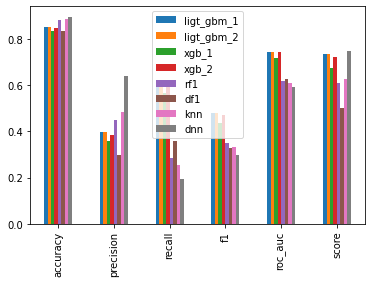

under sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.192,0.151,0.307,0.124,0.753,0.649,0.740,0.886
precision,0.120,0.116,0.130,0.113,0.261,0.187,0.249,0.487
recall,0.973,0.987,0.906,0.997,0.654,0.634,0.651,0.339
f1,0.213,0.207,0.227,0.204,0.373,0.289,0.360,0.400
roc_auc,0.533,0.516,0.569,0.505,0.710,0.642,0.701,0.647
score,0.665,0.669,0.637,0.671,0.627,0.542,0.614,0.677


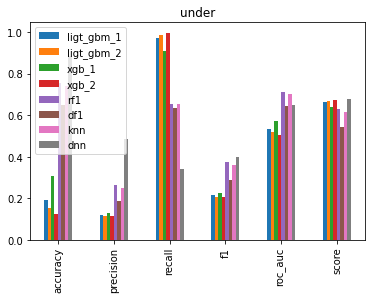

over sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.294,0.205,0.416,0.137,0.862,0.839,0.778,0.711
precision,0.129,0.121,0.142,0.114,0.385,0.299,0.260,0.238
recall,0.923,0.968,0.833,0.986,0.380,0.322,0.530,0.712
f1,0.227,0.215,0.243,0.204,0.382,0.310,0.349,0.357
roc_auc,0.569,0.538,0.598,0.507,0.652,0.613,0.670,0.712
score,0.646,0.663,0.608,0.666,0.598,0.479,0.557,0.637


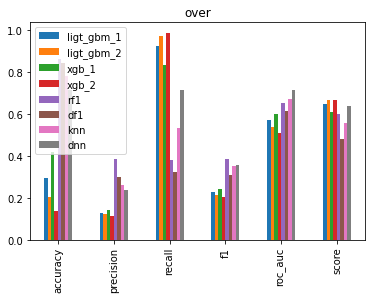

smote sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.839,0.842,0.831,0.838,0.879,0.834,0.860,0.889
precision,0.370,0.377,0.348,0.368,0.438,0.293,0.372,0.514
recall,0.611,0.620,0.579,0.616,0.283,0.338,0.351,0.298
f1,0.461,0.469,0.435,0.461,0.344,0.314,0.361,0.377
roc_auc,0.739,0.745,0.721,0.741,0.618,0.617,0.638,0.631
score,0.712,0.724,0.672,0.713,0.596,0.482,0.569,0.681


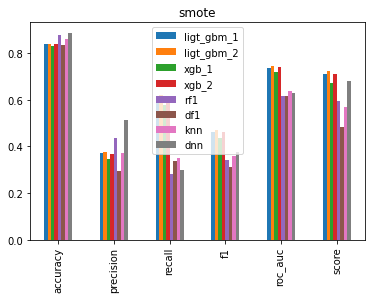

In [37]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_mo.loc[:,:'nr.employed'],df_mo['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

None sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.850,0.854,0.836,0.844,0.882,0.832,0.887,0.893
precision,0.391,0.402,0.355,0.379,0.458,0.288,0.497,0.641
recall,0.606,0.608,0.558,0.603,0.283,0.334,0.258,0.100
f1,0.476,0.484,0.434,0.466,0.350,0.309,0.339,0.173
roc_auc,0.743,0.747,0.715,0.739,0.620,0.615,0.612,0.546
score,0.730,0.742,0.667,0.717,0.616,0.475,0.641,0.697


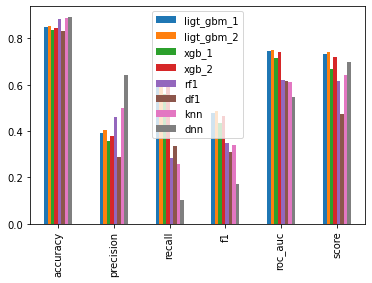

under sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.195,0.147,0.319,0.181,0.755,0.650,0.742,0.863
precision,0.121,0.116,0.134,0.119,0.263,0.189,0.253,0.384
recall,0.981,0.989,0.924,0.981,0.655,0.641,0.663,0.359
f1,0.215,0.207,0.234,0.212,0.376,0.291,0.366,0.371
roc_auc,0.538,0.515,0.583,0.530,0.712,0.646,0.707,0.643
score,0.670,0.670,0.651,0.668,0.630,0.548,0.624,0.585


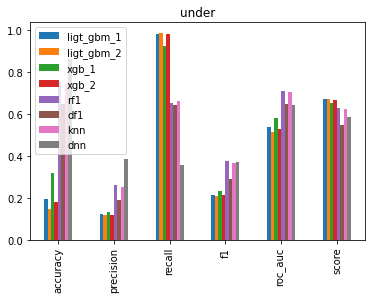

over sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.303,0.209,0.428,0.123,0.862,0.840,0.781,0.837
precision,0.131,0.121,0.146,0.113,0.383,0.311,0.267,0.358
recall,0.924,0.966,0.842,0.996,0.374,0.348,0.541,0.568
f1,0.230,0.216,0.249,0.203,0.379,0.329,0.358,0.440
roc_auc,0.574,0.540,0.609,0.504,0.649,0.625,0.677,0.720
score,0.648,0.662,0.618,0.671,0.592,0.506,0.570,0.676


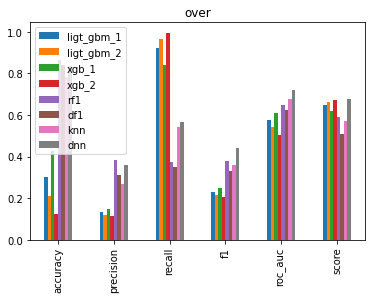

smote sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.835,0.836,0.830,0.835,0.880,0.832,0.866,0.892
precision,0.361,0.365,0.349,0.363,0.448,0.282,0.398,0.544
recall,0.614,0.620,0.586,0.618,0.287,0.322,0.369,0.265
f1,0.455,0.459,0.437,0.458,0.350,0.301,0.383,0.356
roc_auc,0.738,0.742,0.724,0.740,0.621,0.609,0.649,0.618
score,0.705,0.712,0.677,0.709,0.609,0.462,0.605,0.692


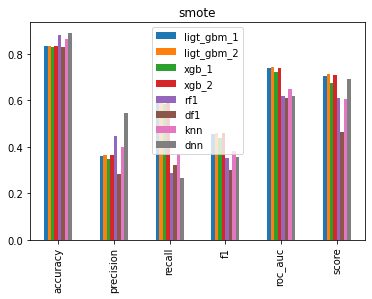

In [40]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_mo_dropna.loc[:,:'nr.employed'],df_mo_dropna['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

# 최적 모델 탐색
## 원데이터 학습(샘플링 방식에 따라 구분)

In [6]:
df_onehot_none = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'])
df_onehot_under = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'under')
df_onehot_over = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'over')
df_onehot_smote = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'smote')

In [7]:
def best_score(df,i):
    for j in i:
        dt = df.loc[j,:]
        a = pd.DataFrame(dt[dt==max(dt)])
        print(f'best of {j}:',dt[dt==max(dt)])
        print('')

        
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.897
Name: accuracy, dtype: float64

best of precision: dnn    0.627
Name: precision, dtype: float64

best of recall: xgb_2    0.473
Name: recall, dtype: float64

best of f1: ligt_gbm_2    0.327
Name: f1, dtype: float64

best of roc_auc: ligt_gbm_2    0.645
Name: roc_auc, dtype: float64

best of score: dnn    0.74
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.775
Name: accuracy, dtype: float64

best of precision: knn    0.228
Name: precision, dtype: float64

best of recall: ligt_gbm_2    0.992
Name: recall, dtype: float64

best of f1: dnn    0.297
Name: f1, dtype: float64

best of roc_auc: dnn    0.642
Name: roc_auc, dtype: float64

best of score: ligt_gbm_2    0.669
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: xgb_2    0.999
Name: recall, dtyp

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

In [8]:
df_dropna_none = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'])
df_dropna_under = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'under')
df_dropna_over = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'over')
df_dropna_smote = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'smote')

In [9]:
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.897
Name: accuracy, dtype: float64

best of precision: dnn    0.627
Name: precision, dtype: float64

best of recall: xgb_2    0.473
Name: recall, dtype: float64

best of f1: ligt_gbm_2    0.327
Name: f1, dtype: float64

best of roc_auc: ligt_gbm_2    0.645
Name: roc_auc, dtype: float64

best of score: dnn    0.74
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.775
Name: accuracy, dtype: float64

best of precision: knn    0.228
Name: precision, dtype: float64

best of recall: ligt_gbm_2    0.992
Name: recall, dtype: float64

best of f1: dnn    0.297
Name: f1, dtype: float64

best of roc_auc: dnn    0.642
Name: roc_auc, dtype: float64

best of score: ligt_gbm_2    0.669
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: xgb_2    0.999
Name: recall, dtyp

In [10]:
X= df_dropna.loc[:,:'pout_unknown']
y = df_dropna['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = Sequential()
model.add(Dense(64,input_dim = len(X_train.columns),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                      ,tf.keras.metrics.Recall(name='recall')
                      ,tf.keras.metrics.FalsePositives(name='false_positives')
                      ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                      ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])

history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)

model.save('dnn_model.h5')

model = 